# Estadistica inferencial no parametrica: Prueba U de Mann-Whitney

### Ruta para analizar los datos:
![Non-parametric](../../Modelab-Python/manuals/figures/flowchart_nonparametric.png)


El test de Mann Whitney es una alternativa no parametrica al t-test para muestras independientes. **Sirve** para **comparar dos muestras independientes** cuando **no se puede asumir normalidad en los datos** 



In [25]:
import pandas as pd 

def import_csv(file):
    return pd.read_csv(file)

In [26]:
# creamos la función de la ubicación del csv
path = "../../Datos/Terminos_lagoon_TA_DIC_2023_RawData.csv"

# importamos el archivo
CO2Data = import_csv(path)

## Mann Whitney U test

In [27]:
from scipy.stats import mannwhitneyu

def mann_whitney_test(data1, data2, alpha=0.05):
    result = mannwhitneyu(data1, data2, alternative='two-sided')

    print (f"U statistic = {result.statistic}")
    print(f"p-value = {result.pvalue}")

    if result.pvalue < alpha:
        print("La diferencia es estadisticamente significativa.")
    else:
        print("La diferencia NO es estadisticamente significativa.")

### Gráfica de cajas y bigotes para la TA 

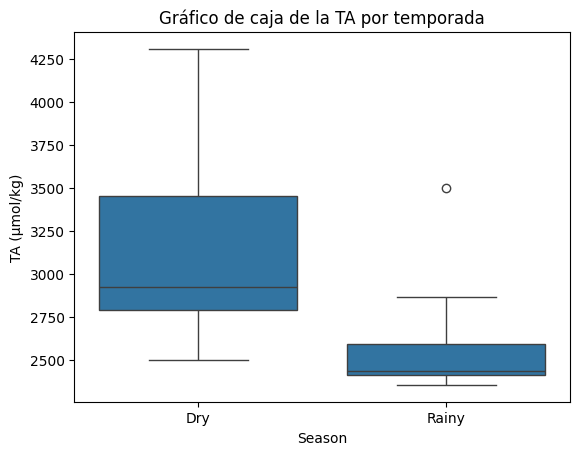

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# creamos un gráfico de caja
sns.boxplot(x='season', y='ta_micromol_kg', data=CO2Data)
#sns.swarmplot(x='season', y='sal_psu', data=CO2Data, color="0.25")

# añadimos etiquetas y titulo
plt.xlabel('Season')
plt.ylabel('TA (µmol/kg)')
plt.title('Gráfico de caja de la TA por temporada')

plt.show()

### Confirmamos con el test U de Mann Whitney

In [29]:
# filtramos los datos de TA por season
ta_dry = CO2Data.loc[CO2Data["season"] == "Dry", "ta_micromol_kg"]
ta_rainy = CO2Data.loc[CO2Data["season"] == "Rainy", "ta_micromol_kg"]

# realizamos la prueba U de Mann Whitney para TA entre las estaciones secas y de lluvia
mann_whitney_test(ta_dry, ta_rainy)



U statistic = 2251.5
p-value = 3.618607122062942e-12
La diferencia es estadisticamente significativa.


### Gráfica de cajas y bigotes para la salinidad

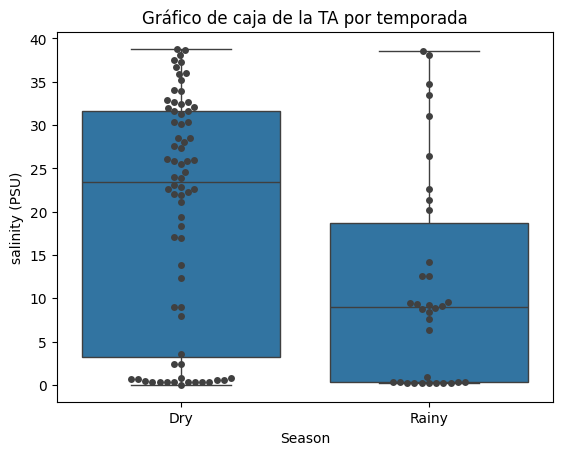

In [30]:
# creamos un gráfico de caja
sns.boxplot(x='season', y='sal_psu', data=CO2Data)
# agrega la distribución de los puntos
sns.swarmplot(x='season', y='sal_psu', data=CO2Data, color="0.25")

# añadimos etiquetas y titulo
plt.xlabel('Season')
plt.ylabel('salinity (PSU)')
plt.title('Gráfico de caja de la TA por temporada')

plt.show()

### Confirmamos con el test U de Mann Whitney

In [31]:
# filtramos los datos de TA por season
ta_dry = CO2Data.loc[CO2Data["season"] == "Dry", "sal_psu"]
ta_rainy = CO2Data.loc[CO2Data["season"] == "Rainy", "sal_psu"]

# realizamos la prueba U de Mann Whitney para TA entre las estaciones secas y de lluvia
mann_whitney_test(ta_dry, ta_rainy)

U statistic = 1660.0
p-value = 0.003199701027350606
La diferencia es estadisticamente significativa.


Se ve que el gráfico y el U test nos dan cosas raras por lo que usamos otro gráfico para confirmar


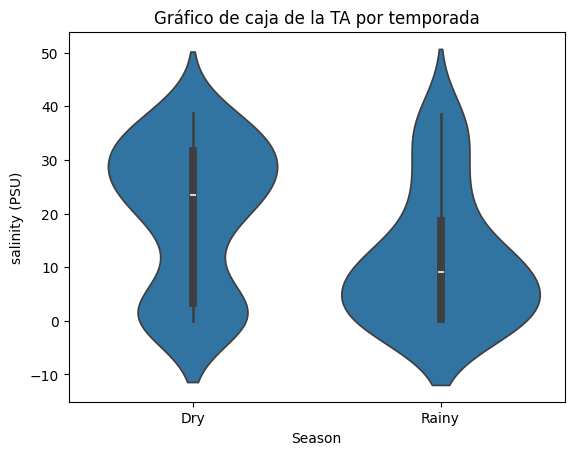

In [32]:
# creamos un gráfico de caja
sns.violinplot(x='season', y='sal_psu', data=CO2Data)
# agrega la distribución de los puntos
#sns.swarmplot(x='season', y='sal_psu', data=CO2Data, color="0.25")

# añadimos etiquetas y titulo
plt.xlabel('Season')
plt.ylabel('salinity (PSU)')
plt.title('Gráfico de caja de la TA por temporada')

plt.show()